In [1]:
# Installing packages

In [2]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
# !pip install beautifulsoup4
# !pip install textblob
# !pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
# !pip install wordcloud
# !pip install tqdm

In [3]:
# Importing Packages

In [1]:
import warnings
import pandas as pd
import preprocess_kgptalkie as ps
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pickle
import os

In [2]:
text = "I am https://google.com"
text = ps.remove_urls(text)
text

'I am '

In [6]:
# Adding the dataset into the csv

In [10]:
url = 'https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv'
data_df = pd.read_csv(url , header=None)
data_df.to_csv('tweets.csv', mode='a', index=False, header=not os.path.isfile('tweets.csv'))
data_df

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
75677,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75680,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [11]:
warnings.filterwarnings('ignore')

In [12]:
saved_df = pd.read_csv('tweets.csv' , header=None)
saved_df

,0,1,2,3
0,Steven Cohen,"Apr 9, 2024 · 3:29 PM UTC",Positive,It should be a great day at the ballpark on Su...
1,Chris Christie,"Apr 7, 2024 · 9:10 PM UTC",Positive,Way to go .@RegueroKatia The only way to respo...
2,Chris Christie,"Apr 5, 2024 · 2:30 PM UTC",Negative,A few moments ago our entire house shook for a...
3,Chris Christie,"Mar 28, 2024 · 2:01 AM UTC",Neutral,“I appreciate the encouragement I’ve gotten to...
4,Chris Christie,"Mar 28, 2024 · 2:00 AM UTC",Positive,I am sad to lose him as a friend and as an exa...
...,...,...,...,...
159813,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
159814,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
159815,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
159816,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [13]:
# Combine both dataset

In [14]:
df = pd.concat([data_df, saved_df], axis=0)
df

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
159813,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
159814,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
159815,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
159816,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [15]:
df = df[[2,3]].reset_index(drop = True)
df

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
235495,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
235496,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
235497,Positive,Today sucked so it’s time to drink wine n play...
235498,Positive,Bought a fraction of Microsoft today. Small wins.


In [16]:
df.columns = ['sentiment', 'text']
df

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
235495,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
235496,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
235497,Positive,Today sucked so it’s time to drink wine n play...
235498,Positive,Bought a fraction of Microsoft today. Small wins.


In [17]:
df.isnull().sum()
print(df.shape)


(235500, 2)


In [18]:
df.dropna(inplace=True)
df = df[df['text'].apply(len)>5]
print(df.shape)


(227097, 2)


In [19]:
df.sentiment.value_counts()

sentiment
Negative      68018
Positive      63426
Neutral       57236
Irrelevant    38417
Name: count, dtype: int64

In [20]:
df = ps.get_basic_features(df)
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [21]:
df.head(3)

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0


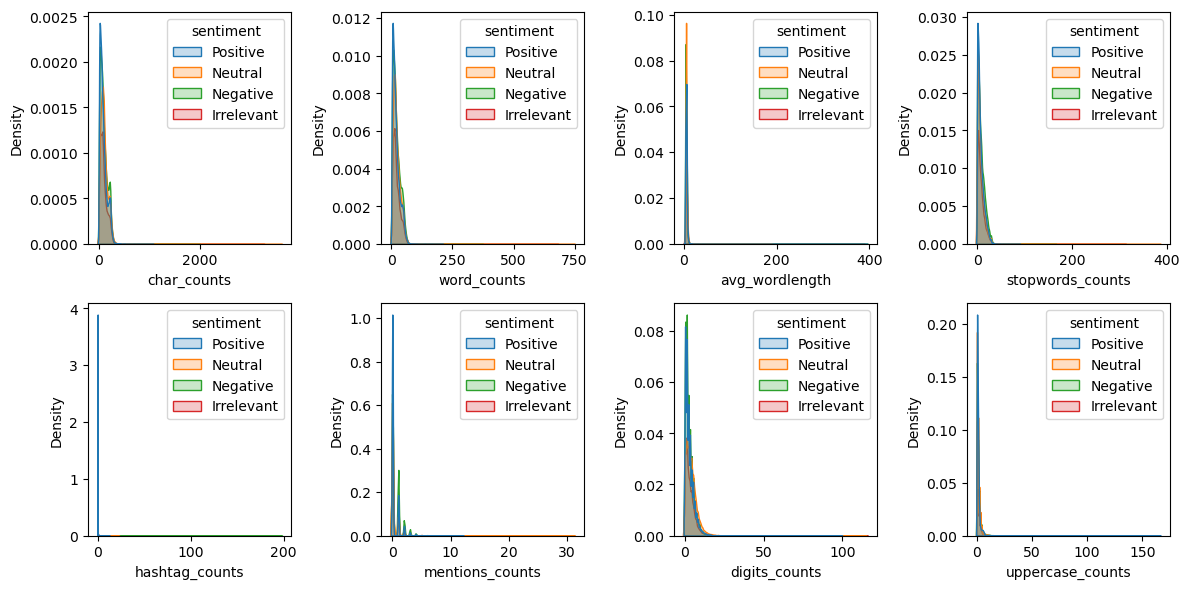

In [22]:
plt.figure(figsize = (12,6))
num_cols = df.select_dtypes(include='number').columns

for index,col in enumerate(num_cols):
    plt.subplot(2,4, index+1)
    sns.kdeplot(data=df, x=col, hue="sentiment", fill=True)
    
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

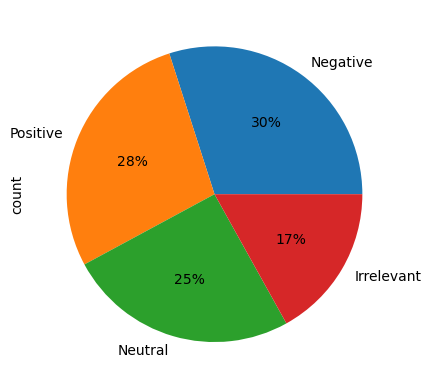

In [23]:
df['sentiment'].value_counts().plot(kind='pie', autopct="%1.0f%%")

In [24]:
# wordcloud visualization
stopwords = list(STOPWORDS)
stopwords

["they'd",
 "she'll",
 'when',
 "don't",
 'a',
 "i'd",
 "he'd",
 'into',
 'until',
 'he',
 'its',
 'this',
 'herself',
 "how's",
 'was',
 'up',
 'whom',
 "i'll",
 'we',
 'my',
 'only',
 'your',
 'same',
 'otherwise',
 'k',
 'as',
 "shan't",
 "haven't",
 "wouldn't",
 'themselves',
 'further',
 "i've",
 "let's",
 'more',
 'there',
 'has',
 'after',
 'like',
 'hers',
 'against',
 "hadn't",
 "they've",
 'else',
 'just',
 'where',
 'some',
 'over',
 'had',
 'them',
 "when's",
 "we'll",
 'you',
 'very',
 "can't",
 'of',
 'our',
 "what's",
 "who's",
 "she's",
 'by',
 'can',
 'no',
 "they'll",
 'few',
 "why's",
 'been',
 'ever',
 'theirs',
 'shall',
 'any',
 'com',
 'being',
 "couldn't",
 'am',
 'is',
 "hasn't",
 'out',
 'did',
 'each',
 'their',
 "where's",
 'therefore',
 'why',
 "you've",
 'during',
 'which',
 'before',
 'own',
 'an',
 'it',
 "we're",
 'on',
 "doesn't",
 "here's",
 'i',
 'and',
 'for',
 "i'm",
 "wasn't",
 "weren't",
 'with',
 'what',
 'having',
 "he's",
 'get',
 'me',
 "she'

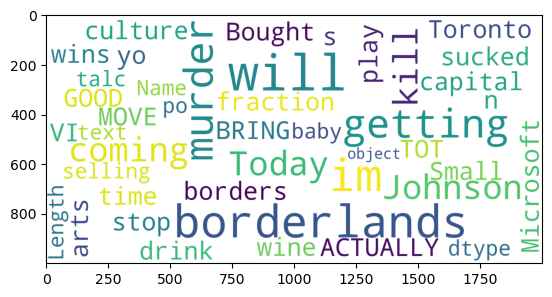

In [25]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=5).generate(str(df['text']))
plt.imshow(wordcloud)


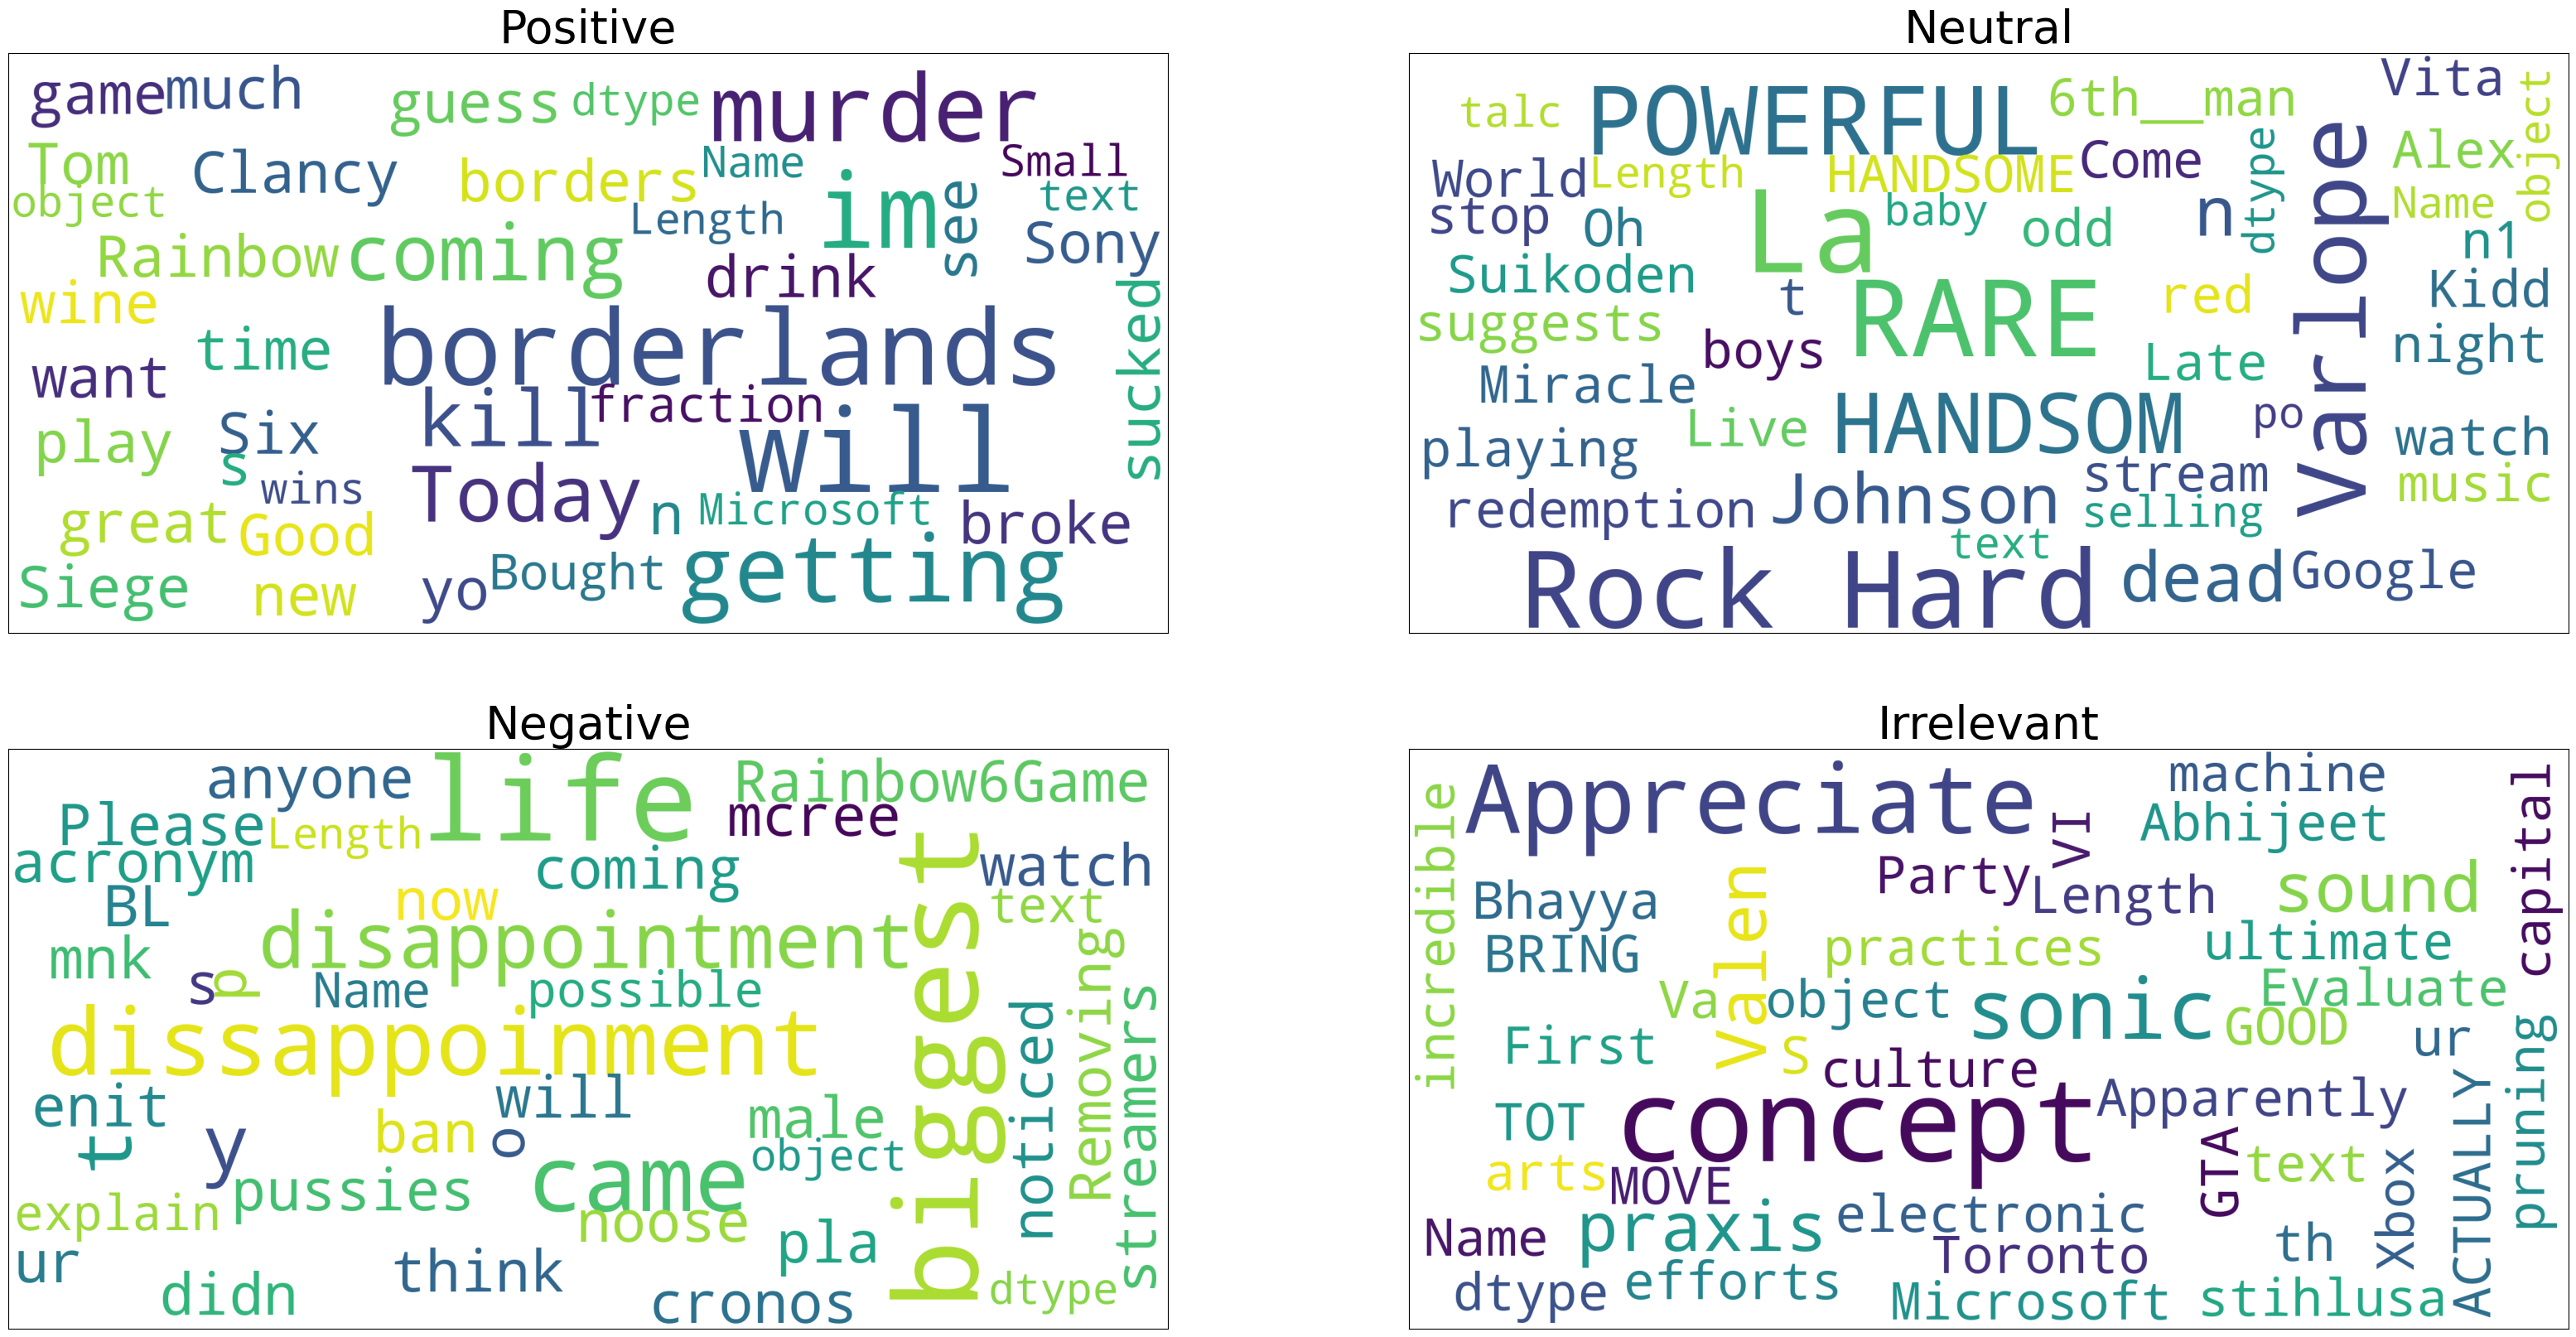

In [26]:
plt.figure(figsize=(40,20))
for index, sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2,index+1)
    df1 = df[df['sentiment'] == sent]['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=5).generate(str(df1))
    plt.imshow(wordcloud)
    plt.xticks([])    
    plt.yticks([])
    plt.title(sent, fontsize = 40)

In [27]:
# data cleaning

In [28]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

In [29]:
# train test split

In [30]:

x_train, x_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=0)

In [31]:
x_train.shape, x_test.shape

((181677,), (45420,))

In [32]:
# model building and testing

In [33]:
clf = Pipeline([('tfid', TfidfVectorizer(stop_words=stopwords)),
                ('rfc', RandomForestClassifier(n_jobs=1))])
clf.fit(x_train, y_train)


Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=["they'd", "she'll", 'when',
                                             "don't", 'a', "i'd", "he'd",
                                             'into', 'until', 'he', 'its',
                                             'this', 'herself', "how's", 'was',
                                             'up', 'whom', "i'll", 'we', 'my',
                                             'only', 'your', 'same',
                                             'otherwise', 'k', 'as', "shan't",
                                             "haven't", "wouldn't",
                                             'themselves', ...])),
                ('rfc', RandomForestClassifier(n_jobs=1))])

In [34]:
# evaluation 

In [35]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.99      0.97      0.98      7634
    Negative       0.98      0.97      0.98     13598
     Neutral       0.96      0.97      0.97     11443
    Positive       0.97      0.98      0.97     12745

    accuracy                           0.97     45420
   macro avg       0.98      0.97      0.98     45420
weighted avg       0.98      0.97      0.97     45420



In [36]:
# save this model


In [37]:
pickle.dump(clf, open('twitter_sentiment.pkl', 'wb'))

In [10]:
import pickle
model = pickle.load(open("twitter_sentiment.pkl", 'rb'))
prediction = model.predict(['It should be a great day at the ballpark on Sunday when Doc Gooden’s #16 get retired. Can’t wait to celebrate one of our best of all time.'])
prediction_proba = model.predict_proba(['It should be a great day at the ballpark on Sunday when Doc Gooden’s #16 get retired. Can’t wait to celebrate one of our best of all time.'])[0]
confidence = max(prediction_proba)
print(prediction, prediction_proba)

['Positive'] [0.08 0.02 0.13 0.77]
